In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
import seaborn as sb

# LOAD DATA FROM YFINANCE

In [2]:
m_funds = yf.download('VMNFX QAMNX NHMCX FRSSX COGIX PLHZX HMEAX CFACX DBLLX AMFNX AGEYX',start='2020-12-05', end='2022-12-06')
m_funds.tail()

[*********************100%***********************]  11 of 11 completed


Adj Close                                                          \
               AGEYX  AMFNX  CFACX  COGIX DBLLX FRSSX      HMEAX NHMCX PLHZX   
Date                                                                           
2022-11-29      6.70  13.79  11.39  12.29  8.98   NaN  19.629999   NaN   NaN   
2022-11-30      6.73  13.73  11.47  12.34  8.98   NaN  19.660000   NaN   NaN   
2022-12-01      6.71  13.50  11.58  12.32  9.02   NaN  19.629999   NaN   NaN   
2022-12-02      6.72  13.47  11.62  12.39  9.03   NaN  19.620001   NaN   NaN   
2022-12-05      6.73  13.54  11.53  12.41  9.03   NaN  19.620001   NaN   NaN   

                       ... Volume                                            \
                QAMNX  ...  AMFNX CFACX COGIX DBLLX FRSSX HMEAX NHMCX PLHZX   
Date                   ...                                                    
2022-11-29  18.540001  ...      0     0     0     0   NaN     0   NaN   NaN   
2022-11-30  18.520000  ...      0     0     0     0   NaN     0   NaN   NaN   
2022-12-01  18.580000  ...      0     0     0     0   NaN     0   NaN   NaN   
2022-12-02  18.469999  ...      0     0     0     0   NaN     0   NaN   NaN   
2022-12-05  18.490000  ...      0     0     0     0   NaN     0   NaN   NaN   

                        
           QAMNX VMNFX  
Date                    
2022-11-29   0.0     0  
2022-11-30   0.0     0  
2022-12-01   0.0     0  
2022-12-02   0.0     0  
2022-12-05   0.0     0  

[5 rows x 66 columns]

In [3]:
# Closing price
m_funds = m_funds['Adj Close']
print (m_funds)

               AGEYX      AMFNX      CFACX  COGIX     DBLLX      FRSSX  \
Date                                                                     
2020-12-07  7.089278   9.409717  13.343350   9.89  9.535955  18.441032   
2020-12-08  7.097848   9.409717  13.352776   9.95  9.545538  18.341780   
2020-12-09  7.114993   9.409717  13.333926   9.98  9.545538  18.232605   
2020-12-10  7.123564   9.464213  13.362196   9.93  9.555121  18.143278   
2020-12-11  7.123564   9.427882  13.371618   9.95  9.555121  18.173050   
...              ...        ...        ...    ...       ...        ...   
2022-11-29  6.700000  13.790000  11.390000  12.29  8.980000        NaN   
2022-11-30  6.730000  13.730000  11.470000  12.34  8.980000        NaN   
2022-12-01  6.710000  13.500000  11.580000  12.32  9.020000        NaN   
2022-12-02  6.720000  13.470000  11.620000  12.39  9.030000        NaN   
2022-12-05  6.730000  13.540000  11.530000  12.41  9.030000        NaN   

                HMEAX      NHMCX     

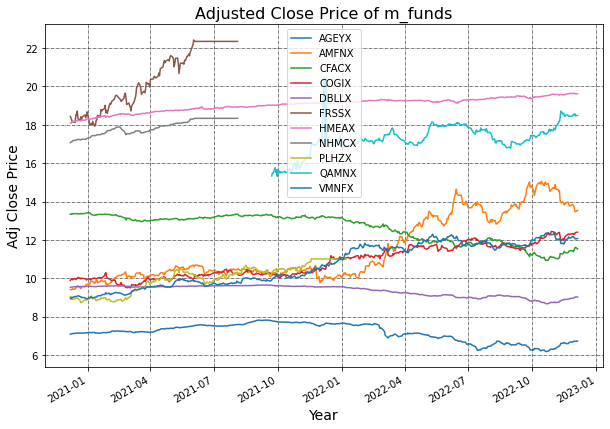

In [4]:
# Plot the adjusted close price
m_funds.plot(figsize=(10, 7))

# Define the label for the title of the figure
plt.title("Adjusted Close Price of m_funds" % m_funds, fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Adj Close Price', fontsize=14) 
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Show the plot
plt.show()

In [5]:
# Log of percentage change of all m_funds in the list
m_funds_return= m_funds.pct_change().apply(lambda x: np.log(1+x)) # CONVERT TO m_funds_return 
m_funds_return.head()

,AGEYX,AMFNX,CFACX,COGIX,DBLLX,FRSSX,HMEAX,NHMCX,PLHZX,QAMNX,VMNFX
Date,,,,,,,,,,,
2020-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-08,0.001208,0.000000,0.000706,0.006048,0.001004,-0.005397,0.000000,0.001719,-0.007765,NaN,-0.004439
2020-12-09,0.002413,0.000000,-0.001413,0.003011,0.000000,-0.005970,0.001455,0.000572,0.005552,NaN,0.006652
2020-12-10,0.001204,0.005775,0.002118,-0.005023,0.001003,-0.004911,0.001453,0.002286,-0.014501,NaN,0.003309
2020-12-11,0.000000,-0.003846,0.000705,0.002012,0.000000,0.001640,0.001451,0.001711,0.000000,NaN,0.000000


<AxesSubplot:title={'center':'mutual funds daily returns'}, xlabel='Date'>

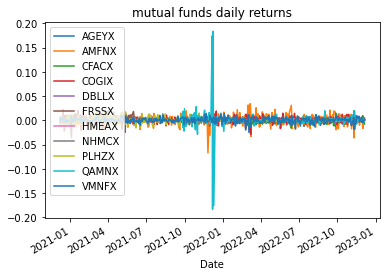

In [6]:
m_funds_return.plot(title='mutual funds daily returns')

In [7]:
annualised_m_funds_return = m_funds_return.mean()*252 
print (annualised_m_funds_return)

AGEYX   -0.026108
AMFNX    0.182678
CFACX   -0.073324
COGIX    0.113941
DBLLX   -0.027367
FRSSX    0.096507
HMEAX    0.040591
NHMCX    0.035871
PLHZX    0.098693
QAMNX    0.155596
VMNFX    0.149796
dtype: float64


In [8]:
annualised_Risk = m_funds_return.std()*(252)**(0.5) 
print(annualised_Risk)

AGEYX    0.059092
AMFNX    0.147305
CFACX    0.054520
COGIX    0.089281
DBLLX    0.020607
FRSSX    0.077317
HMEAX    0.015175
NHMCX    0.012468
PLHZX    0.076289
QAMNX    0.343095
VMNFX    0.075386
dtype: float64


In [9]:
m_funds_return_Covar = m_funds_return.cov()
print(m_funds_return_Covar)

              AGEYX         AMFNX         CFACX         COGIX         DBLLX  \
AGEYX  1.385676e-05 -7.474564e-06  2.388422e-06 -2.487318e-06  2.349000e-06   
AMFNX -7.474564e-06  8.610574e-05 -1.824868e-05 -1.183384e-07 -5.142749e-06   
CFACX  2.388422e-06 -1.824868e-05  1.179515e-05 -5.099013e-07  3.098137e-06   
COGIX -2.487318e-06 -1.183384e-07 -5.099013e-07  3.163116e-05 -4.147127e-07   
DBLLX  2.349000e-06 -5.142749e-06  3.098137e-06 -4.147127e-07  1.685122e-06   
FRSSX  4.122868e-07  4.960680e-06  8.683328e-07 -8.983088e-07  3.638702e-07   
HMEAX  5.639949e-07 -1.082686e-07  4.937851e-07 -1.439253e-07  1.964825e-07   
NHMCX  2.074901e-07  1.677095e-07  2.438331e-07  2.799533e-08  1.075634e-07   
PLHZX  3.417350e-07  8.039988e-06 -6.732322e-07  3.994628e-06  1.059447e-07   
QAMNX  3.607496e-07 -8.707810e-07 -1.280140e-06 -7.608355e-06 -3.013694e-07   
VMNFX  1.588503e-07  7.800982e-06 -2.518913e-06  5.309943e-06 -3.803770e-07   

              FRSSX         HMEAX         NHMCX    

In [10]:
# Log of percentage change and creeate Covariance matrix
cov_matrix = m_funds.pct_change().apply(lambda x: np.log(1+x)).cov() 
cov_matrix

,AGEYX,AMFNX,CFACX,COGIX,DBLLX,FRSSX,HMEAX,NHMCX,PLHZX,QAMNX,VMNFX
AGEYX,1.385676e-05,-7.474564e-06,2.388422e-06,-2.487318e-06,2.349000e-06,4.122868e-07,5.639949e-07,2.074901e-07,3.417350e-07,3.607496e-07,1.588503e-07
AMFNX,-7.474564e-06,8.610574e-05,-1.824868e-05,-1.183384e-07,-5.142749e-06,4.960680e-06,-1.082686e-07,1.677095e-07,8.039988e-06,-8.707810e-07,7.800982e-06
CFACX,2.388422e-06,-1.824868e-05,1.179515e-05,-5.099013e-07,3.098137e-06,8.683328e-07,4.937851e-07,2.438331e-07,-6.732322e-07,-1.280140e-06,-2.518913e-06
COGIX,-2.487318e-06,-1.183384e-07,-5.099013e-07,3.163116e-05,-4.147127e-07,-8.983088e-07,-1.439253e-07,2.799533e-08,3.994628e-06,-7.608355e-06,5.309943e-06
DBLLX,2.349000e-06,-5.142749e-06,3.098137e-06,-4.147127e-07,1.685122e-06,3.638702e-07,1.964825e-07,1.075634e-07,1.059447e-07,-3.013694e-07,-3.803770e-07
FRSSX,4.122868e-07,4.960680e-06,8.683328e-07,-8.983088e-07,3.638702e-07,2.372191e-05,3.225527e-07,9.245766e-08,4.242657e-06,0.000000e+00,-3.852023e-07
HMEAX,5.639949e-07,-1.082686e-07,4.937851e-07,-1.439253e-07,1.964825e-07,3.225527e-07,9.137629e-07,7.186845e-08,8.579077e-08,-1.223702e-07,-1.899441e-07
NHMCX,2.074901e-07,1.677095e-07,2.438331e-07,2.799533e-08,1.075634e-07,9.245766e-08,7.186845e-08,6.169079e-07,-2.979122e-07,0.000000e+00,5.824523e-08
PLHZX,3.417350e-07,8.039988e-06,-6.732322e-07,3.994628e-06,1.059447e-07,4.242657e-06,8.579077e-08,-2.979122e-07,2.309550e-05,5.173187e-06,7.902411e-06
QAMNX,3.607496e-07,-8.707810e-07,-1.280140e-06,-7.608355e-06,-3.013694e-07,0.000000e+00,-1.223702e-07,0.000000e+00,5.173187e-06,4.671209e-04,-8.709398e-07


In [11]:
m_funds_return_Corr = m_funds_return.corr() 
print(m_funds_return_Corr)

          AGEYX     AMFNX     CFACX     COGIX     DBLLX     FRSSX     HMEAX  \
AGEYX  1.000000 -0.216391  0.186822 -0.118807  0.486112  0.022740  0.158499   
AMFNX -0.216391  1.000000 -0.572616 -0.002268 -0.426937  0.109762 -0.012206   
CFACX  0.186822 -0.572616  1.000000 -0.026398  0.694918  0.051911  0.150408   
COGIX -0.118807 -0.002268 -0.026398  1.000000 -0.056803 -0.032794 -0.026771   
DBLLX  0.486112 -0.426937  0.694918 -0.056803  1.000000  0.057551  0.158340   
FRSSX  0.022740  0.109762  0.051911 -0.032794  0.057551  1.000000  0.069280   
HMEAX  0.158499 -0.012206  0.150408 -0.026771  0.158340  0.069280  1.000000   
NHMCX  0.070967  0.023011  0.090392  0.006337  0.105497  0.024169  0.095722   
PLHZX  0.019103  0.180292 -0.040790  0.147793  0.016982  0.181259  0.018675   
QAMNX  0.003645 -0.003787 -0.014170 -0.059733 -0.008862       NaN -0.006528   
VMNFX  0.008986  0.177029 -0.154444  0.198812 -0.061703 -0.016654 -0.041843   

          NHMCX     PLHZX     QAMNX     VMNFX  
AGE

In [12]:
corr_matrix = m_funds.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,AGEYX,AMFNX,CFACX,COGIX,DBLLX,FRSSX,HMEAX,NHMCX,PLHZX,QAMNX,VMNFX
AGEYX,1.000000,-0.216391,0.186822,-0.118807,0.486112,0.022740,0.158499,0.070967,0.019103,0.003645,0.008986
AMFNX,-0.216391,1.000000,-0.572616,-0.002268,-0.426937,0.109762,-0.012206,0.023011,0.180292,-0.003787,0.177029
CFACX,0.186822,-0.572616,1.000000,-0.026398,0.694918,0.051911,0.150408,0.090392,-0.040790,-0.014170,-0.154444
COGIX,-0.118807,-0.002268,-0.026398,1.000000,-0.056803,-0.032794,-0.026771,0.006337,0.147793,-0.059733,0.198812
DBLLX,0.486112,-0.426937,0.694918,-0.056803,1.000000,0.057551,0.158340,0.105497,0.016982,-0.008862,-0.061703
FRSSX,0.022740,0.109762,0.051911,-0.032794,0.057551,1.000000,0.069280,0.024169,0.181259,NaN,-0.016654
HMEAX,0.158499,-0.012206,0.150408,-0.026771,0.158340,0.069280,1.000000,0.095722,0.018675,-0.006528,-0.041843
NHMCX,0.070967,0.023011,0.090392,0.006337,0.105497,0.024169,0.095722,1.000000,-0.078925,NaN,0.015616
PLHZX,0.019103,0.180292,-0.040790,0.147793,0.016982,0.181259,0.018675,-0.078925,1.000000,0.093287,0.346263
QAMNX,0.003645,-0.003787,-0.014170,-0.059733,-0.008862,NaN,-0.006528,NaN,0.093287,1.000000,-0.007611


<AxesSubplot:>

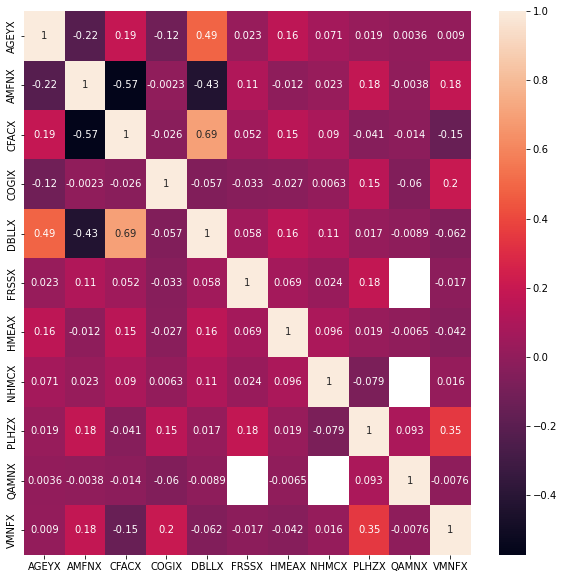

In [13]:
plt.figure(figsize=(10,10))
sb.heatmap(corr_matrix, annot=True)

In [14]:
sharpe_ratio = m_funds_return.mean()/m_funds_return.std()
sharpe_ratio

AGEYX   -0.027832
AMFNX    0.078121
CFACX   -0.084721
COGIX    0.080394
DBLLX   -0.083659
FRSSX    0.078629
HMEAX    0.168503
NHMCX    0.181233
PLHZX    0.081494
QAMNX    0.028568
VMNFX    0.125173
dtype: float64

In [15]:
Ann_sharpe_ratio = sharpe_ratio*(252)**(0.5)
Ann_sharpe_ratio

AGEYX   -0.441814
AMFNX    1.240135
CFACX   -1.344911
COGIX    1.276214
DBLLX   -1.328048
FRSSX    1.248199
HMEAX    2.674903
NHMCX    2.876981
PLHZX    1.293673
QAMNX    0.453506
VMNFX    1.987058
dtype: float64

In [16]:
best_sharpe_ratio= Ann_sharpe_ratio[Ann_sharpe_ratio>1]
best_sharpe_ratio

AMFNX    1.240135
COGIX    1.276214
FRSSX    1.248199
HMEAX    2.674903
NHMCX    2.876981
PLHZX    1.293673
VMNFX    1.987058
dtype: float64

# New Portfolio Selection

In [17]:
n_m_funds = yf.download('VMNFX QAMNX NHMCX FRSSX COGIX HMEAX AMFNX PLHZX',start='2020-12-05', end='2022-12-06')
n_m_funds.tail()

[*********************100%***********************]  8 of 8 completed


Adj Close                                                        \
               AMFNX  COGIX FRSSX      HMEAX NHMCX PLHZX      QAMNX  VMNFX   
Date                                                                         
2022-11-29     13.79  12.29   NaN  19.629999   NaN   NaN  18.540001  12.18   
2022-11-30     13.73  12.34   NaN  19.660000   NaN   NaN  18.520000  12.12   
2022-12-01     13.50  12.32   NaN  19.629999   NaN   NaN  18.580000  12.10   
2022-12-02     13.47  12.39   NaN  19.620001   NaN   NaN  18.469999  12.05   
2022-12-05     13.54  12.41   NaN  19.620001   NaN   NaN  18.490000  12.08   

            Close         ...       Open        Volume                    \
            AMFNX  COGIX  ...      QAMNX  VMNFX  AMFNX COGIX FRSSX HMEAX   
Date                      ...                                              
2022-11-29  13.79  12.29  ...  18.540001  12.18      0     0   NaN     0   
2022-11-30  13.73  12.34  ...  18.520000  12.12      0     0   NaN     0   
2022-12-01  13.50  12.32  ...  18.580000  12.10      0     0   NaN     0   
2022-12-02  13.47  12.39  ...  18.469999  12.05      0     0   NaN     0   
2022-12-05  13.54  12.41  ...  18.490000  12.08      0     0   NaN     0   

                                    
           NHMCX PLHZX QAMNX VMNFX  
Date                                
2022-11-29   NaN   NaN   0.0     0  
2022-11-30   NaN   NaN   0.0     0  
2022-12-01   NaN   NaN   0.0     0  
2022-12-02   NaN   NaN   0.0     0  
2022-12-05   NaN   NaN   0.0     0  

[5 rows x 48 columns]

In [18]:
n_m_funds = n_m_funds['Adj Close']
print (n_m_funds)

                AMFNX  COGIX      FRSSX      HMEAX      NHMCX     PLHZX  \
Date                                                                      
2020-12-07   9.409717   9.89  18.441032  18.095997  17.075193  9.044893   
2020-12-08   9.409717   9.95  18.341782  18.095997  17.104561  8.974932   
2020-12-09   9.409717   9.98  18.232605  18.122349  17.114355  9.024903   
2020-12-10   9.464213   9.93  18.143276  18.148703  17.153517  8.894977   
2020-12-11   9.427883   9.95  18.173052  18.175056  17.182892  8.894977   
...               ...    ...        ...        ...        ...       ...   
2022-11-29  13.790000  12.29        NaN  19.629999        NaN       NaN   
2022-11-30  13.730000  12.34        NaN  19.660000        NaN       NaN   
2022-12-01  13.500000  12.32        NaN  19.629999        NaN       NaN   
2022-12-02  13.470000  12.39        NaN  19.620001        NaN       NaN   
2022-12-05  13.540000  12.41        NaN  19.620001        NaN       NaN   

                QAMNX   

In [19]:
# Log of percentage change of new m_funds in the list
n_m_funds_return = n_m_funds.pct_change().apply(lambda x: np.log(1+x)) # CONVERT TO m_funds_return 
n_m_funds_return.head()

,AMFNX,COGIX,FRSSX,HMEAX,NHMCX,PLHZX,QAMNX,VMNFX
Date,,,,,,,,
2020-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-08,0.000000,0.006048,-0.005397,0.000000,0.001718,-0.007765,NaN,-0.004439
2020-12-09,0.000000,0.003011,-0.005970,0.001455,0.000572,0.005552,NaN,0.006652
2020-12-10,0.005775,-0.005023,-0.004911,0.001453,0.002286,-0.014501,NaN,0.003309
2020-12-11,-0.003846,0.002012,0.001640,0.001451,0.001711,0.000000,NaN,0.000000


In [20]:
ann_n_m_funds_return = n_m_funds_return.mean()*252 
print (ann_n_m_funds_return)

AMFNX    0.182678
COGIX    0.113941
FRSSX    0.096507
HMEAX    0.040590
NHMCX    0.035871
PLHZX    0.098693
QAMNX    0.155596
VMNFX    0.149796
dtype: float64


In [21]:
ann_n_Risk = n_m_funds_return.std()*(252)**(0.5) 
print(ann_n_Risk)

AMFNX    0.147305
COGIX    0.089281
FRSSX    0.077317
HMEAX    0.015175
NHMCX    0.012468
PLHZX    0.076289
QAMNX    0.343095
VMNFX    0.075386
dtype: float64


In [22]:
# Log of percentage change and create Covariance matrix of New Portfolio 
n_cov_matrix = n_m_funds.pct_change().apply(lambda x: np.log(1+x)).cov() 
n_cov_matrix

,AMFNX,COGIX,FRSSX,HMEAX,NHMCX,PLHZX,QAMNX,VMNFX
AMFNX,8.610573e-05,-1.183386e-07,4.960674e-06,-1.083140e-07,1.676923e-07,8.039987e-06,-8.707696e-07,7.800981e-06
COGIX,-1.183386e-07,3.163116e-05,-8.983057e-07,-1.439360e-07,2.799726e-08,3.994628e-06,-7.608354e-06,5.309943e-06
FRSSX,4.960674e-06,-8.983057e-07,2.372191e-05,3.225890e-07,9.242988e-08,4.242658e-06,0.000000e+00,-3.852062e-07
HMEAX,-1.083140e-07,-1.439360e-07,3.225890e-07,9.137749e-07,7.186629e-08,8.575608e-08,-1.224602e-07,-1.900051e-07
NHMCX,1.676923e-07,2.799726e-08,9.242988e-08,7.186629e-08,6.169038e-07,-2.979124e-07,0.000000e+00,5.825844e-08
PLHZX,8.039987e-06,3.994628e-06,4.242658e-06,8.575608e-08,-2.979124e-07,2.309550e-05,5.173209e-06,7.902411e-06
QAMNX,-8.707696e-07,-7.608354e-06,0.000000e+00,-1.224602e-07,0.000000e+00,5.173209e-06,4.671210e-04,-8.709285e-07
VMNFX,7.800981e-06,5.309943e-06,-3.852062e-07,-1.900051e-07,5.825844e-08,7.902411e-06,-8.709285e-07,2.255166e-05


In [23]:
# Log of percentage change and creeate Covariance matrix
n_cov_matrix = n_m_funds.pct_change().apply(lambda x: np.log(1+x)).cov() 
n_cov_matrix

,AMFNX,COGIX,FRSSX,HMEAX,NHMCX,PLHZX,QAMNX,VMNFX
AMFNX,8.610573e-05,-1.183386e-07,4.960674e-06,-1.083140e-07,1.676923e-07,8.039987e-06,-8.707696e-07,7.800981e-06
COGIX,-1.183386e-07,3.163116e-05,-8.983057e-07,-1.439360e-07,2.799726e-08,3.994628e-06,-7.608354e-06,5.309943e-06
FRSSX,4.960674e-06,-8.983057e-07,2.372191e-05,3.225890e-07,9.242988e-08,4.242658e-06,0.000000e+00,-3.852062e-07
HMEAX,-1.083140e-07,-1.439360e-07,3.225890e-07,9.137749e-07,7.186629e-08,8.575608e-08,-1.224602e-07,-1.900051e-07
NHMCX,1.676923e-07,2.799726e-08,9.242988e-08,7.186629e-08,6.169038e-07,-2.979124e-07,0.000000e+00,5.825844e-08
PLHZX,8.039987e-06,3.994628e-06,4.242658e-06,8.575608e-08,-2.979124e-07,2.309550e-05,5.173209e-06,7.902411e-06
QAMNX,-8.707696e-07,-7.608354e-06,0.000000e+00,-1.224602e-07,0.000000e+00,5.173209e-06,4.671210e-04,-8.709285e-07
VMNFX,7.800981e-06,5.309943e-06,-3.852062e-07,-1.900051e-07,5.825844e-08,7.902411e-06,-8.709285e-07,2.255166e-05


In [24]:
# Randomly weighted portfolio's variance
w = {'AMFNX':0.11,'COGIX':0.14,'FRSSX':0.16,'HMEAX':0.13,'NHMCX':0.12,'PLHZX':0.09, 'VMNFX':0.15, 'QAMNX':0.10}
port_var = n_cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
Ann_port_std = (port_var*252)**(0.5)
print (port_var)
print (port_var*252)

8.685366346559187e-06
0.002188712319332915


In [25]:
Ann_port_std

0.04678367577834083

In [26]:
# Yearly returns for individual Mutual Funds 
ind_m_funds = n_m_funds.resample('Y').last().pct_change().mean()
ind_m_funds

AMFNX    0.192763
COGIX    0.116243
FRSSX    0.098189
HMEAX    0.035413
NHMCX    0.029952
PLHZX    0.117845
QAMNX    0.073745
VMNFX    0.165270
dtype: float64

In [27]:
# EQ weighted portfolio's risk Devide by the number of portfolio 
w = [0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,]
portfolio_variance = n_cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
annualised_portfolio_variance = (portfolio_variance*252)**(0.5)
print(annualised_portfolio_variance)

0.34289660809297345


In [28]:
# Volatility is given by the annual standard deviation. We multiply by 252 because there are 252 trading days/year.
annualised_sd = n_m_funds.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252)) 
annualised_sd

AMFNX    0.147305
COGIX    0.089281
FRSSX    0.077317
HMEAX    0.015175
NHMCX    0.012468
PLHZX    0.076289
QAMNX    0.343095
VMNFX    0.075386
dtype: float64

In [29]:
assets = pd.concat([ind_m_funds, annualised_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
AMFNX,0.192763,0.147305
COGIX,0.116243,0.089281
FRSSX,0.098189,0.077317
HMEAX,0.035413,0.015175
NHMCX,0.029952,0.012468
PLHZX,0.117845,0.076289
QAMNX,0.073745,0.343095
VMNFX,0.165270,0.075386


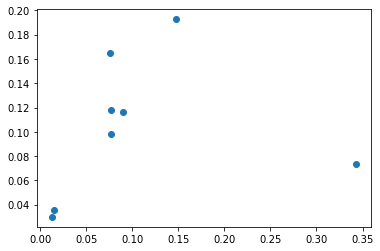

In [30]:
import matplotlib.pyplot as plt
x = annualised_sd # RISK
y = ind_m_funds # Return
plt.scatter(x, y)
plt.show()

In [31]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights
num_assets = len(n_m_funds.columns)
num_portfolios = 10000

In [32]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_m_funds) # Returns are the product of individual expected returns of asset and its
    # weights
    p_ret.append(returns)
    var = n_cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Portfolio Variance
    sd = np.sqrt(var) #Daily standard deviation
    annualised_sd = sd*np.sqrt(252) #Annual standard deviation = volatility
    p_vol.append(annualised_sd)

In [33]:
data = {'Returns':p_ret, 'Volatility':p_vol}
for counter, symbol in enumerate(assets['Returns'].index.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
    portfolios = pd.DataFrame(data)
    portfolios.head() # Dataframe of the 10000 portfolios created
    
    #explain

<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

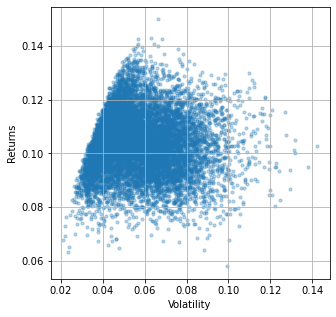

In [34]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[5,5])

In [35]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
min_vol_port

Returns         0.067670
Volatility      0.021089
AMFNX weight    0.049041
COGIX weight    0.079705
FRSSX weight    0.092144
HMEAX weight    0.295920
NHMCX weight    0.319400
PLHZX weight    0.095274
QAMNX weight    0.029428
VMNFX weight    0.039087
Name: 5805, dtype: float64

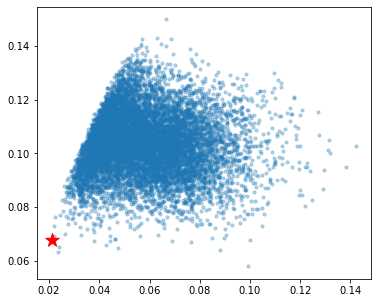

In [36]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[6,5])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200)

In [37]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.087877
Volatility      0.026104
AMFNX weight    0.043875
COGIX weight    0.092182
FRSSX weight    0.158330
HMEAX weight    0.245261
NHMCX weight    0.202936
PLHZX weight    0.061185
QAMNX weight    0.013629
VMNFX weight    0.182601
Name: 4953, dtype: float64

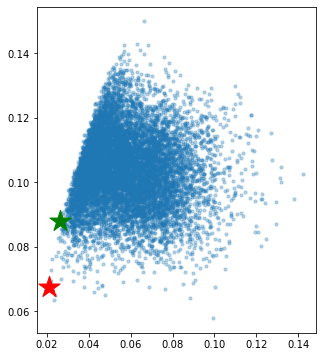

In [38]:
# Plotting optimal portfolio
plt.subplots(figsize=(5, 6))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)